<a href="https://colab.research.google.com/github/balakrishna15/NLP_Projects/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
data = pd.read_csv('Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [2]:
pos = data[data['label']==1]
neg = data[data['label']==0]
print("Positive text \n",pos.head())
print("\nNegative text \n",neg.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1

Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


Text(0.5, 1.0, 'Positive vs Negative')

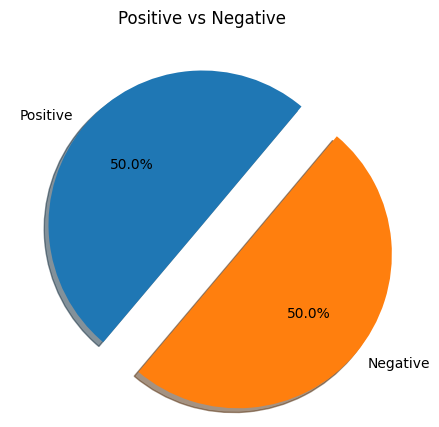

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
temp = [pos['label'].count(), neg['label'].count()]
plt.pie(temp, labels = ["Positive","Negative"],autopct = "%2.1f%%",shadow = True, startangle = 50, explode=(0,0.3))
plt.title('Positive vs Negative')

In [6]:
import re
def preprocess(text):
  text = re.sub('<[^>]*>','',text)
  emoji = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+',' ',text.lower()) +' '.join(emoji).replace('-','')
  return text

In [7]:
data['text'] = data['text'].apply(preprocess)

In [8]:
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [9]:
def tokenizer(text):
  return text.split()
tokenizer("He was joyful as he was working in good environment")

['He',
 'was',
 'joyful',
 'as',
 'he',
 'was',
 'working',
 'in',
 'good',
 'environment']

In [10]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
positive_data = data[data['label']==1]
positive_data = positive_data['text']
negative_data = data[data['label']==0]
negative_data = negative_data['text']

In [13]:
def plot_wordcloud(data, color = 'white'):
  words = ' '.join(data)
  clean_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
  wordcloud = WordCloud(stopwords = stop, background_color = color, width=2500, height = 2000).generate(clean_word)
  plt.figure(1, figsize=(10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()



positive words


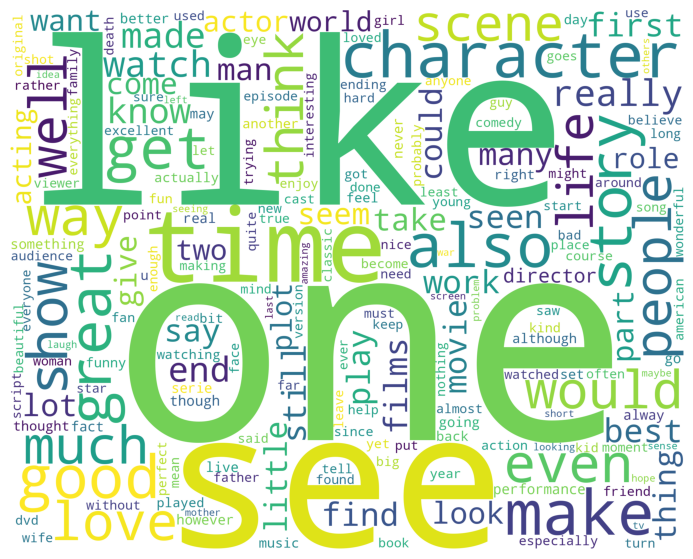

In [14]:
print('positive words')
plot_wordcloud(positive_data, 'white')


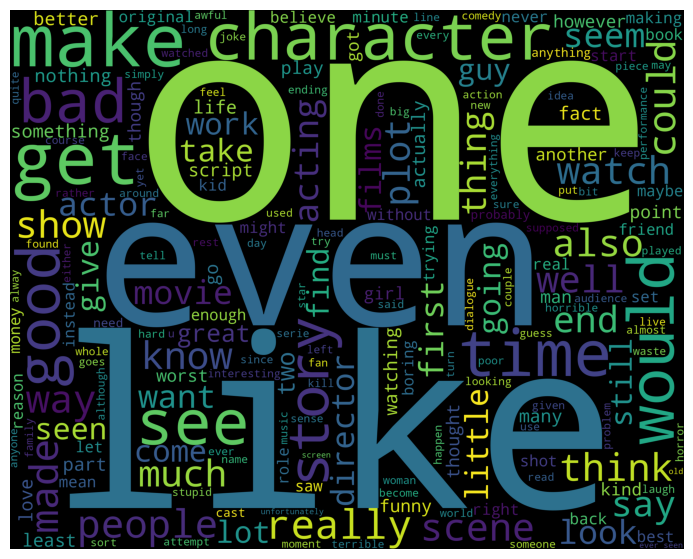

In [15]:
plot_wordcloud(negative_data, 'black')

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(strip_accents = None, preprocessor = None, lowercase = False, use_idf = True, norm ='l2',tokenizer = tokenizer_porter, smooth_idf= True)
y = data.label.values
x = tfid.fit_transform(data.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [19]:
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = model.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.9min finished


In [20]:
from sklearn import metrics
# Accuracy of our built model
print("Accuracy of our model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of our model: 0.89045
